In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df_train = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t', encoding='utf-8')

In [32]:
df_train.rating.value_counts()


5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [33]:
#merged_by_group = df_train.groupby([df_train.rating]).verified_reviews.apply(sum)

In [34]:
#a = pd.DataFrame(merged_by_group).reset_index()

In [35]:
df_train_1 = df_train.drop(['date','variation', 'feedback'],axis=1)

In [36]:
df_train_1['phrase_len'] = [len(t) for t in df_train_1.verified_reviews]
df_train_1.head(4)

,rating,verified_reviews,phrase_len
0,5,Love my Echo!,13
1,5,Loved it!,9
2,4,"Sometimes while playing a game, you can answer...",195
3,5,I have had a lot of fun with this thing. My 4 ...,172


In [37]:
#Filtering out positive and negative reviews
neg_phrases = df_train_1[df_train_1.rating == 1]
neg_words = []
for t in neg_phrases.verified_reviews:
    neg_words.append(t)
neg_words[:4]


[u'Not much features.',
 u"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 u'Alexa hardly came on..',
 u'Item no longer works after just 5 months of use. Will not connect to wifi and unresponsive to reset requests.']

In [38]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

u"Not much features. Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was wo"

In [39]:
pos_phrases = df_train_1[df_train_1.rating == 5] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.verified_reviews:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]
    

u'Love my Echo! Loved it! I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs,'

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(stop_words='english',max_df = 0.85, ngram_range=(1,2))
cvector.fit(df_train_1.verified_reviews)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.85, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [41]:
len(cvector.get_feature_names())


23994

In [42]:
neg_matrix = cvector.transform(df_train_1[df_train_1.rating == 1].verified_reviews)
som_neg_matrix = cvector.transform(df_train_1[df_train_1.rating == 2].verified_reviews)
neu_matrix = cvector.transform(df_train_1[df_train_1.rating == 3].verified_reviews)
som_pos_matrix = cvector.transform(df_train_1[df_train_1.rating == 4].verified_reviews)
pos_matrix = cvector.transform(df_train_1[df_train_1.rating == 5].verified_reviews)

In [43]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [44]:
neg_tf.head()


,Terms,negative
0,echo,50
1,34,46
2,amazon,45
3,product,27
4,dot,27


In [16]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
the,263
to,198
it,191
and,152
is,85


In [45]:
som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df.head()

NameError: name 'som_neg_tf_df' is not defined

In [46]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head()

,neutral
Terms,
echo,55
alexa,53
like,37
speaker,30
music,28


In [47]:
som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')
som_pos_words_tf_df.head()

,some-positive
Terms,
echo,154
great,127
alexa,121
like,118
music,101


In [20]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
the,1849
it,1771
to,1634
and,1477
my,980


In [48]:
term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

NameError: name 'neg_tf_df' is not defined

In [22]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,some-negative,neutral,some-positive,positive,total
the,263,193,290,687,1849,3282
it,191,155,190,611,1771,2918
to,198,173,227,593,1634,2825
and,152,106,103,387,1477,2225
my,58,49,81,228,980,1396
is,85,83,114,266,671,1219
for,64,45,81,193,679,1062
love,6,1,8,93,848,956
echo,50,42,55,154,538,839
this,79,67,47,117,524,834


Text(0.5,1,'Top 500 words in Amazon Reviews')

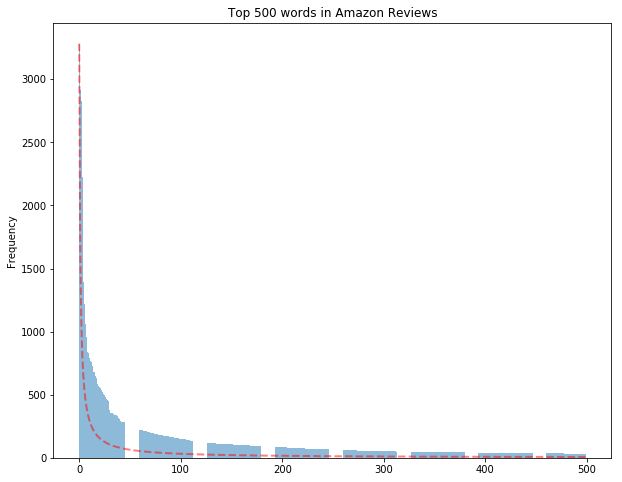

In [23]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 words in Amazon Reviews')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_train_1.verified_reviews)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
neg_matrix = cvec.transform(df_train_1[df_train_1.rating == 1].verified_reviews)
som_neg_matrix = cvec.transform(df_train_1[df_train_1.rating == 2].verified_reviews)
neu_matrix = cvec.transform(df_train_1[df_train_1.rating == 3].verified_reviews)
som_pos_matrix = cvec.transform(df_train_1[df_train_1.rating == 4].verified_reviews)
pos_matrix = cvec.transform(df_train_1[df_train_1.rating == 5].verified_reviews)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')


som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','some-positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['some-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['some-positive'] \
                                 +  term_freq_df['positive'] 
        
term_freq_df.sort_values(by='total', ascending=False).head(15)

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,some-negative,neutral,some-positive,positive,total
love,6,1,8,93,848,956
echo,50,42,55,154,538,839
great,11,7,14,127,570,729
alexa,19,35,53,121,404,632
music,8,24,28,101,379,540
like,16,27,37,118,306,504
use,13,20,18,97,321,469
works,18,5,16,62,280,381
easy,1,0,8,40,293,342
sound,7,21,27,69,216,340


In [26]:
phrase = np.array(df_train_1['verified_reviews'])
sentiments = np.array(df_train_1['rating'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

In [28]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)

In [29]:
# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)

In [49]:
####Evaluation metrics


from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [31]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
sgd = SGDClassifier(loss='hinge', n_iter=100)

In [32]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.8095)
('Precision:', 0.79479999999999995)
('Recall:', 0.8095)
('F1 Score:', 0.77500000000000002)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.71      0.30      0.42        40
           2       1.00      0.37      0.54        19
           3       0.73      0.32      0.44        25
           4       0.66      0.30      0.41        83
           5       0.82      0.99      0.90       463

   micro avg       0.81      0.81      0.81       630
   macro avg       0.78      0.46      0.54       630
weighted avg       0.79      0.81      0.78       630


Prediction Confusion Matrix:
------------------------------
          Predicted:               
                   1  2  3   4    5
Actual: 1         12  0  0   4   24
        2          1  7  0   4    7
        3          2  0  8   2   13
        4          1  0  2  25   55
  

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.73170000000000002)
('Precision:', 0.5403)
('Recall:', 0.73170000000000002)
('F1 Score:', 0.62160000000000004)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        83
           5       0.74      1.00      0.85       463

   micro avg       0.73      0.73      0.73       630
   macro avg       0.15      0.20      0.17       630
weighted avg       0.54      0.73      0.62       630


Prediction Confusion Matrix:
------------------------------
          Predicted:              
                   1  2  3  4    5
Actual: 1          0  0  0  0   40
        2          0  0  0  1   18
        3          0  0  0  0   25
        4          0  0  0  0 

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [36]:
# SGD model on Countvectorizer
sgd_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_bow_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.80000000000000004)
('Precision:', 0.79039999999999999)
('Recall:', 0.80000000000000004)
('F1 Score:', 0.78420000000000001)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.70      0.35      0.47        40
           2       1.00      0.42      0.59        19
           3       0.71      0.40      0.51        25
           4       0.49      0.43      0.46        83
           5       0.85      0.94      0.89       463

   micro avg       0.80      0.80      0.80       630
   macro avg       0.75      0.51      0.58       630
weighted avg       0.79      0.80      0.78       630


Prediction Confusion Matrix:
------------------------------
          Predicted:                
                   1  2   3   4    5
Actual: 1         14  0   1   7   18
        2          2  8   0   4    5
        3          0  0  10   5   10
       

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [38]:
# SGD model on TF-IDF
sgd_tfidf_predictions = train_predict_model(classifier=sgd, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_tfidf_predictions,
                                      classes=[1,2,3,4,5])

Model Performance metrics:
------------------------------
('Accuracy:', 0.83020000000000005)
('Precision:', 0.81679999999999997)
('Recall:', 0.83020000000000005)
('F1 Score:', 0.81610000000000005)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.69      0.45      0.55        40
           2       0.78      0.37      0.50        19
           3       0.73      0.44      0.55        25
           4       0.60      0.51      0.55        83
           5       0.87      0.96      0.91       463

   micro avg       0.83      0.83      0.83       630
   macro avg       0.74      0.55      0.61       630
weighted avg       0.82      0.83      0.82       630


Prediction Confusion Matrix:
------------------------------
          Predicted:                
                   1  2   3   4    5
Actual: 1         18  0   3   4   15
        2          5  7   0   3    4
        3          2  2  11   3    7
       

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [40]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance metrics:
------------------------------
('Accuracy:', 0.81430000000000002)
('Precision:', 0.80049999999999999)
('Recall:', 0.81430000000000002)
('F1 Score:', 0.78300000000000003)

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.62      0.20      0.30        40
           2       0.88      0.37      0.52        19
           3       0.75      0.36      0.49        25
           4       0.76      0.41      0.53        83

   micro avg       0.74      0.35      0.47       167
   macro avg       0.60      0.27      0.37       167
weighted avg       0.73      0.35      0.47       167


Prediction Confusion Matrix:
------------------------------
          Predicted:             
                   0  1  2  3   4
Actual: 0          0  0  0  0   0
        1          0  8  0  2   3
        2          0  0  7  0   2
        3          0  

/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dinodjakovac/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to

In [41]:
###########

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

X = df_train_1['verified_reviews']
y = df_train_1['rating']

vectorizer = CountVectorizer()
vectorizer.fit(X)
#print(vectorizer.vocabulary_)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [49]:
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

('Shape of Sparse Matrix: ', (3150, 4044))
('Amount of Non-Zero occurrences: ', 60852)
Density: 0.477697706184


In [50]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.56      0.29      0.38        34
           2       0.57      0.20      0.30        20
           3       0.70      0.30      0.42        46
           4       0.71      0.46      0.56       119
           5       0.82      0.96      0.88       569

   micro avg       0.80      0.80      0.80       788
   macro avg       0.67      0.44      0.51       788
weighted avg       0.78      0.80      0.77       788



In [52]:
X = df_train_1['verified_reviews']
y = df_train_1['rating']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [53]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.47      0.24      0.32        38
           2       1.00      0.16      0.27        32
           3       0.82      0.26      0.39        54
           4       0.73      0.40      0.52       127
           5       0.82      0.98      0.89       694

   micro avg       0.80      0.80      0.80       945
   macro avg       0.77      0.41      0.48       945
weighted avg       0.80      0.80      0.77       945

